In [141]:
import pandas as pd
from sklearn.decomposition import PCA

# load data
streamer_df = pd.read_csv("twitchdata.csv")
streamer_df.index = streamer_df["Channel"]
streamer_df.drop(["Channel", "Partnered"], axis=1, inplace=True)
streamer_df.head(10)

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Channel,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926


/var/folders/n5/2g6gvsg51yzghwd99_55z9xm0000gn/T/ipykernel_1648/911570730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df [col] = (analysis_df [col] - min)/(max - min)


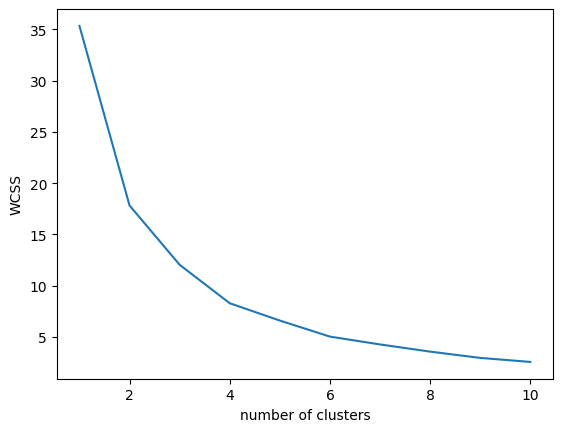

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

analysis_df = streamer_df[["Stream time(minutes)", "Watch time(Minutes)"]]

for col in analysis_df.columns:
    min, max = analysis_df [col].min(), analysis_df[col].max()
    analysis_df [col] = (analysis_df [col] - min)/(max - min)


data = analysis_df.values

seed = 142195953 # my SSN
k_vals = range(1, 11)
wcss = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=seed)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the SSD vs. k values
plt.plot(k_vals, wcss)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

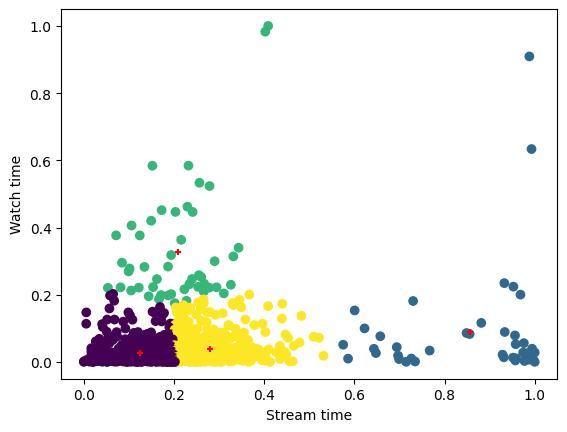

In [143]:
elbow_number = 4 # by looking at graph in previous cell, elbow_number seems to be 3

kmeans = KMeans(n_clusters=elbow_number, n_init="auto", random_state=seed)
kmeans.fit(data)

labels = kmeans.labels_
centers = kmeans.cluster_centers_
streamer_df["cluster"] = labels

# scatter plot dis bih
plt.scatter(data[:, 0], data[:, 1], c=labels)

# plot center of each group
plt.scatter(centers[:, 0], centers[:, 1], marker='+', s=25, color='red')
plt.xlabel("Stream time")
plt.ylabel("Watch time")

plt.show()

In [155]:
pd.set_option('display.float_format', '{:.2f}'.format)
grouped = streamer_df.groupby("cluster").mean().sort_values("Watch time(Minutes)", ascending=False)
grouped.head()



,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
cluster,,,,,,,
2,2114121720.61,111154.59,151133.86,19636.16,2384525.14,924799.67,53946209.06
1,666430415.00,447048.21,42919.19,1505.29,442865.10,117438.38,17704197.64
3,354354821.69,148118.69,20286.77,2356.57,398804.86,120933.31,9245856.73
0,280737609.74,68061.64,39944.83,5725.10,549323.41,215594.18,8988531.68


In [153]:
streamer_df[streamer_df["cluster"] == 2].head(10)

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,cluster
Channel,,,,,,,,
xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,2
summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,2
Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,2
Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,2
NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,2
Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,2
loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,2
Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,2
TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,2


In [154]:
streamer_df[streamer_df["cluster"] == 1].head(10)

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,cluster
Channel,,,,,,,,
Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1
ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1
Solary,1546597380,486510,24470,3187,493207,143569,48799554,1
OgamingLoL,1483207890,496950,204491,3020,523758,115965,71583995,1
BeyondTheSummit,1339097490,505080,116547,2635,923689,114948,42403593,1
SolaryFortnite,1223349555,381735,46710,3180,1478270,447191,26737542,1
DreamHackCS,1052904720,314595,212201,5001,1801697,275934,28759226,1
SolaryHS,827452485,460065,17513,1802,149073,35986,10445269,1
蝦愛橘子 (shuteye_orange),728551080,325935,7441,2217,85247,29549,18572922,1
